I have made a new conda kernel called Erdos_Trees, which contains everything from erdos_fall_2024 and adds geopandas and its dependencies. There were a lot of dependencies.

In [33]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt

In [ ]:
with open("InterAgencyFirePerimeterHistory_All_Years_View.geojson") as fires_file:
    fire_df = gpd.read_file(fires_file)

fire_df.head()

0    POLYGON ((-116.30223 48.80925, -116.30219 48.8...
1    MULTIPOLYGON (((-115.66745 45.53181, -115.6673...
2    POLYGON ((-115.62156 46.26331, -115.62161 46.2...
3    POLYGON ((-115.77024 46.94723, -115.76989 46.9...
4    MULTIPOLYGON (((-116.60331 46.10380, -116.6021...
Name: geometry, dtype: geometry

My guess is that all we will need are the "FIRE_YEAR_INT" and "geometry" columns. It would be nice to have more granular data for dates (maybe one of the other datasets has month/day? We could potentially crossreference using "IRWINID"...) but given that tree growth will span many years, this might be good enough.

In [5]:
fire_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7156 entries, 0 to 7155
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       7156 non-null   int64   
 1   MAP_METHOD     7055 non-null   object  
 2   DATE_CUR       7144 non-null   object  
 3   COMMENTS       3639 non-null   object  
 4   GEO_ID         6949 non-null   object  
 5   IRWINID        1119 non-null   object  
 6   UNQE_FIRE_ID   3180 non-null   object  
 7   FIRE_YEAR      7156 non-null   object  
 8   LOCAL_NUM      2634 non-null   object  
 9   INCIDENT       7147 non-null   object  
 10  UNIT_ID        2406 non-null   object  
 11  POO_RESP_I     1298 non-null   object  
 12  FEATURE_CA     7156 non-null   object  
 13  GIS_ACRES      7156 non-null   float64 
 14  USER_NAME      343 non-null    object  
 15  SOURCE         7156 non-null   object  
 16  AGENCY         7156 non-null   object  
 17  FIRE_YEAR_INT  7156 non-n

In [3]:
with open("../Data/WA_plot.csv") as plots:
    plot_big_df = pd.read_csv(plots)

plot_big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 69 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CN                              22083 non-null  int64  
 1   SRV_CN                          22083 non-null  int64  
 2   CTY_CN                          22083 non-null  int64  
 3   PREV_PLT_CN                     9844 non-null   float64
 4   INVYR                           22083 non-null  int64  
 5   STATECD                         22083 non-null  int64  
 6   UNITCD                          22083 non-null  int64  
 7   COUNTYCD                        22083 non-null  int64  
 8   PLOT                            22083 non-null  int64  
 9   PLOT_STATUS_CD                  22083 non-null  int64  
 10  PLOT_NONSAMPLE_REASN_CD         979 non-null    float64
 11  MEASYEAR                        22083 non-null  int64  
 12  MEASMON                         

In [36]:
plotfeatures = ["CN", "PLOT", "LAT", "LON"] # Can add to this as needed

plot_df = gpd.GeoDataFrame(plot_big_df[plotfeatures])
plot_df["Point"] = gpd.points_from_xy(plot_df["LON"], plot_df["LAT"])
plot_df.set_geometry("Point", inplace = True) # This makes gpd recognize the points as points

plot_df["FireOccurrence"] = False
plot_df["FireYears"] = ""

plot_df.head()

,CN,PLOT,LAT,LON,Point,FireOccurrence,FireYears
0,13229216010497,99851,47.966031,-123.184900,POINT (-123.18490 47.96603),False,
1,24121999010900,59643,47.639772,-120.416372,POINT (-120.41637 47.63977),False,
2,24143771010900,72767,47.432623,-123.763728,POINT (-123.76373 47.43262),False,
3,24132612010900,60111,46.169883,-122.280547,POINT (-122.28055 46.16988),False,
4,24169827010900,93596,48.615504,-119.910791,POINT (-119.91079 48.61550),False,


<Axes: >

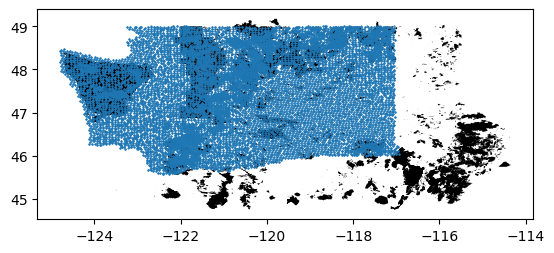

In [42]:
base = fire_df.plot(color = "black")
plot_df.plot(ax = base, markersize = 0.3)